In [2]:
%autosave 100

Autosaving every 100 seconds


In [1]:
import urllib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

url = "https://dl.dropboxusercontent.com/s/q9geru5vtmz5b55/vk.adjlist?dl=1"
with urllib.request.urlopen(url) as f:
    data = f.read().decode('utf-8')
with open('vk.adjlist', 'w') as f:
    f.write(data) 
    
G = nx.read_adjlist('vk.adjlist')
coord = nx.spring_layout(G, k = 0.15)

In [7]:
k = dict (G.degree ())
k2 = {key: value for key, value in k.items() if value > 15 and value < 250}
G = G.subgraph(list(k2.keys()))


In [8]:
# take only giant connected component for the further analysis: 
Gc = max(nx.connected_component_subgraphs(G), key=len)
print("Number of nodes -", len(Gc.nodes()))
print("Number of edges -", len(Gc.edges()))

Number of nodes - 816
Number of edges - 17919


# Structural analysis.

## Centrality measures:

Degree centrality:

/Users/ray/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


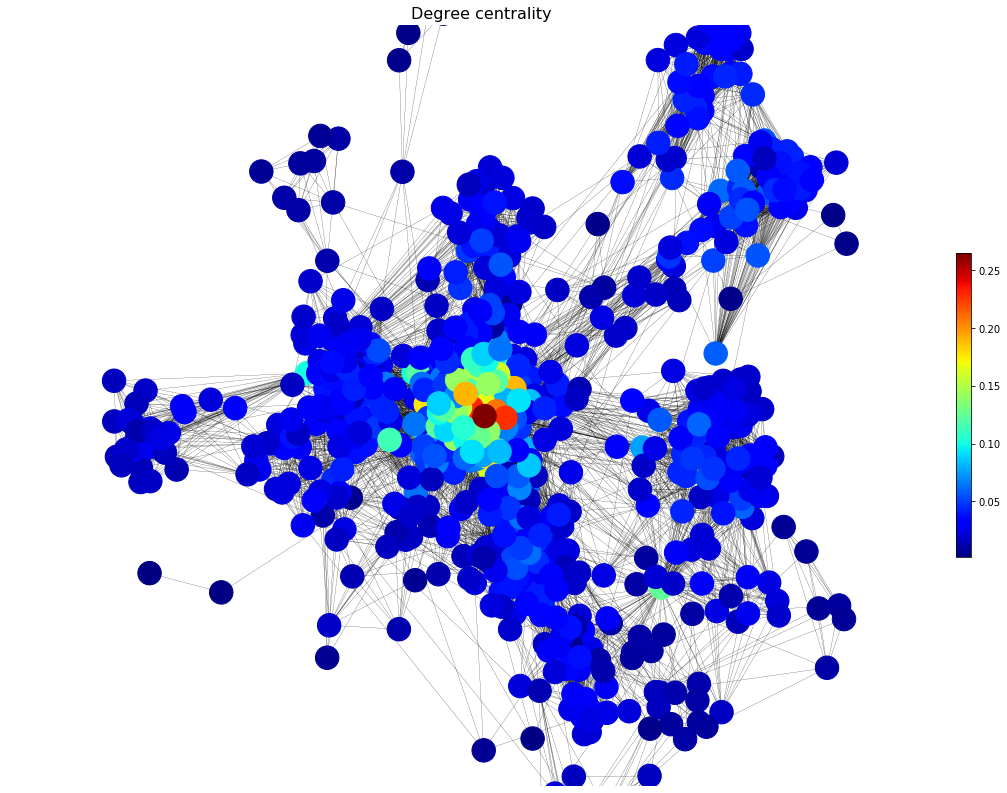

In [5]:
plt.figure(figsize=(20,14))
degree_centr = nx.degree_centrality(Gc)
node_colors = list(degree_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(degree_centr.keys()),
                               cmap = 'jet',
                               with_labels = False)
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Degree centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(degree_centr, key = degree_centr.get)[-3:]

Closeness centrality

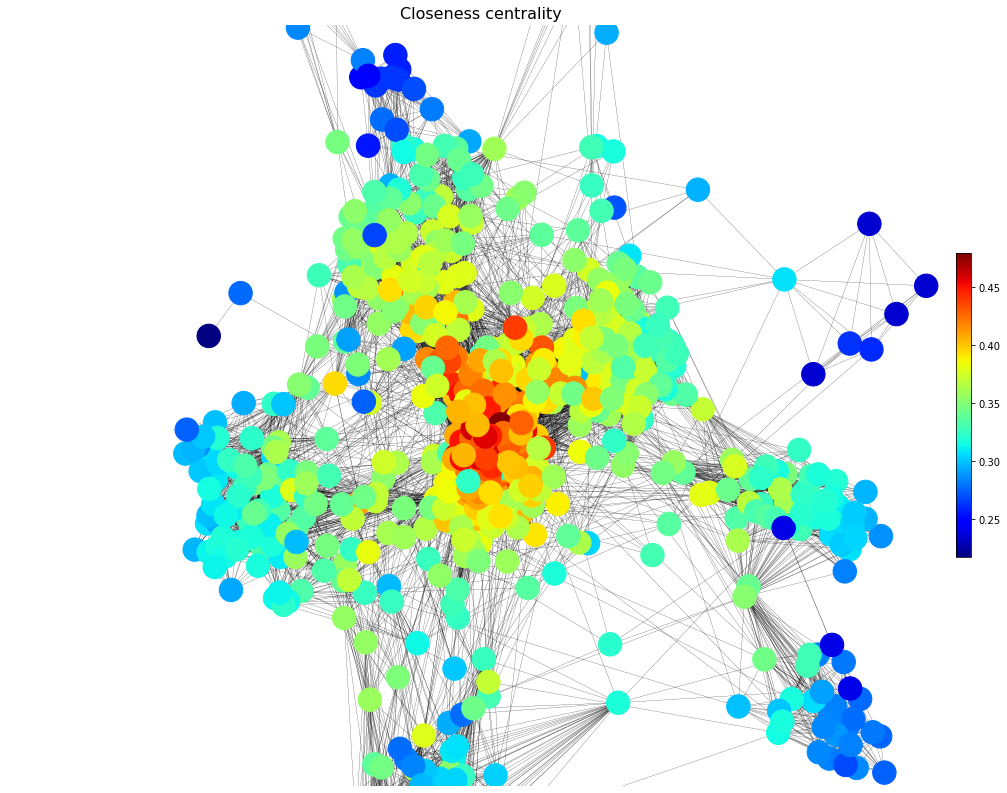

In [13]:
plt.figure(figsize=(20,14))
closeness_centr = nx.closeness_centrality(Gc)
node_colors = list(closeness_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(closeness_centr.keys()),
                               cmap = 'jet',
                               with_labels = False
                               )
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Closeness centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(closeness_centr, key = closeness_centr.get)[-3:]


Betweenness centrality can reveal which nodes make communities to be connected:

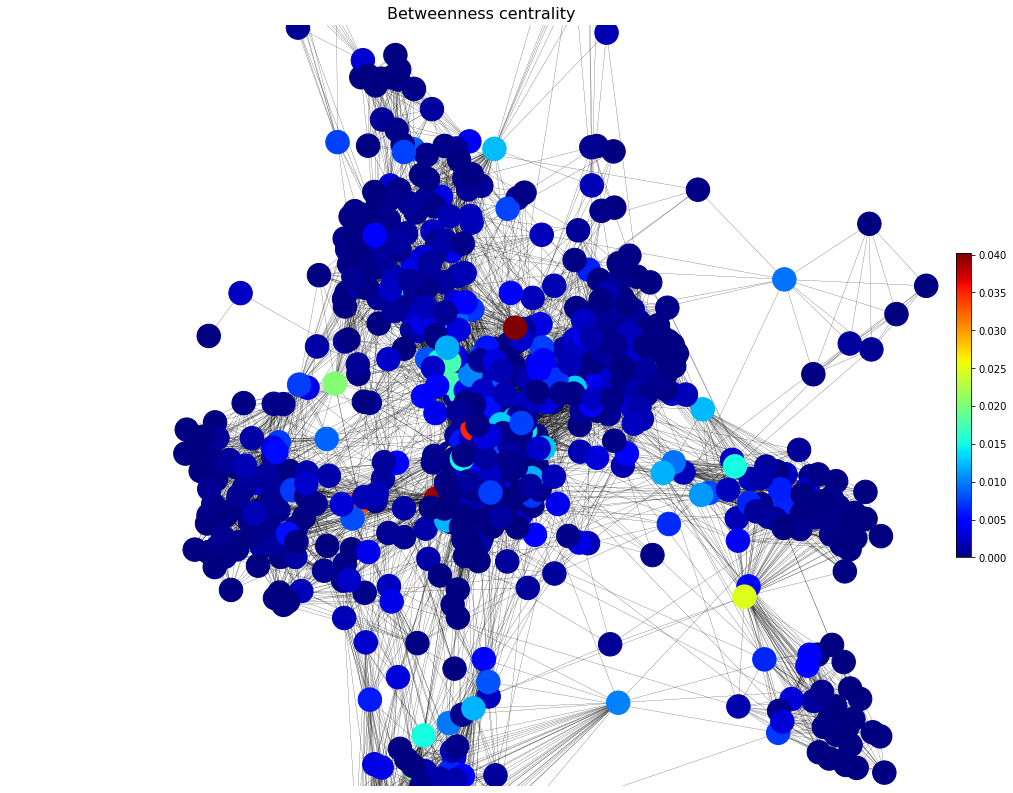

In [14]:
plt.figure(figsize=(20,14))
between_centr = nx.betweenness_centrality(Gc)
node_colors = list(between_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(between_centr.keys()),
                               cmap = 'jet',
                               with_labels = False
                               )
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Betweenness centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(between_centr, key = between_centr.get)[-5:]


Pagerank. Comparison with centrality measures.

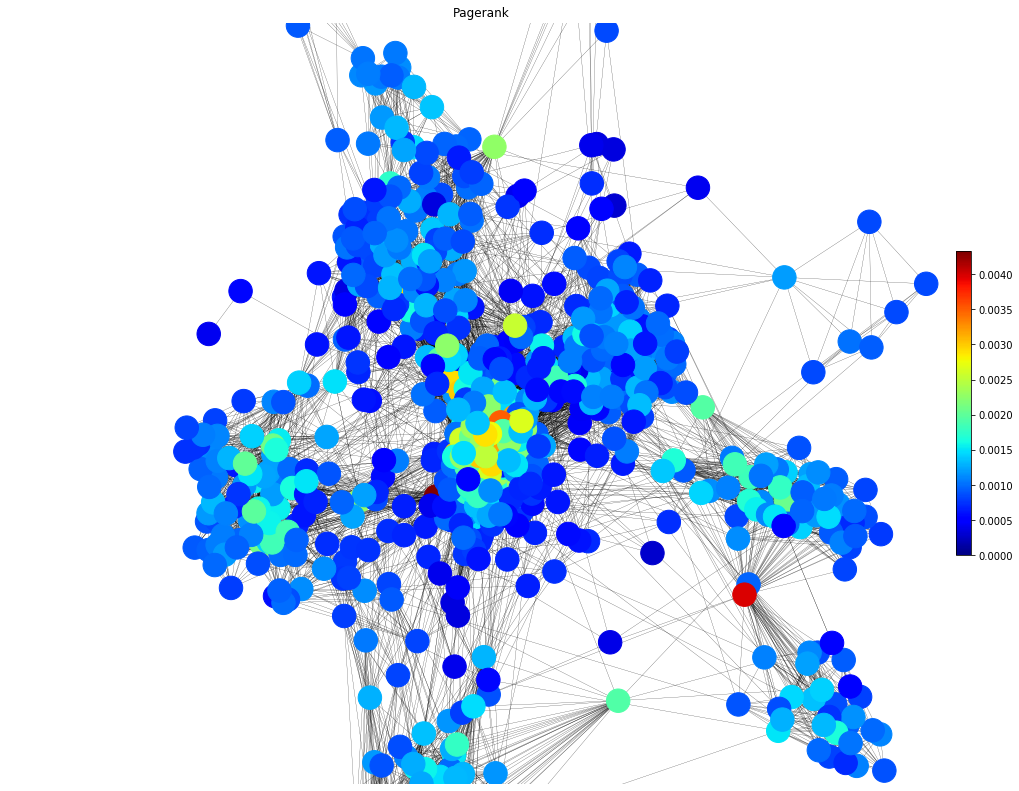

In [15]:
plt.figure(figsize=(20,14))
page_rank = nx.pagerank(Gc)
node_colors = list(page_rank.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(page_rank.keys()),
                               cmap = 'jet',
                               with_labels = False,
                               vmin = 0.0)
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Pagerank')
plt.axis("off")

top_nodes = sorted(page_rank, key = page_rank.get)[-3:]



In [18]:
# function to create proper histogram in matplotlib:
def plot_hist(data, colormap, alpha, bins = 10, round_value = 1):
    cm = plt.cm.get_cmap(colormap)
    counts, bins, patches = plt.hist(data, alpha = alpha, color = 'Blue', bins = bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    plt.xticks(bins.round(round_value))
    col = bin_centers - min(bin_centers)
    col /= max(col)
    # use various colors for different bins:
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

Comparison of metrics:

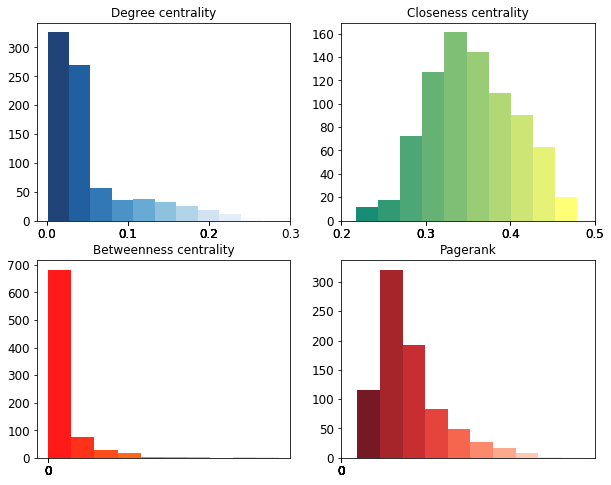

In [19]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title("Degree centrality", y = 1.00)
plot_hist(data = list(degree_centr.values()), colormap = 'Blues_r', alpha = 0.9, bins = 10, round_value=1)

plt.subplot(2, 2, 2)
plt.title("Closeness centrality", y = 1.00)
plot_hist(data = list(closeness_centr.values()), colormap = 'summer', alpha = 0.9, bins = 10, round_value=1)

plt.subplot(2, 2, 3)
plt.title("Betweenness centrality", y = 1.00)
plot_hist(data = list(between_centr.values()), colormap = 'autumn', alpha = 0.9, bins = 10)

plt.subplot(2, 2, 4)
plt.title("Pagerank", y = 1.00)
plot_hist(data = list(page_rank.values()), colormap = 'Reds_r', alpha = 0.9, bins = 10, round_value=2)